## <center> Connected: A Social Netork Analysis with NetworkX </center>

#### 0. Introduction

* Reference: **[Connected: A Social Netowkrk Analysis with NetworkX](https://www.youtube.com/watch?v=7fsreJMy_pI&t=503s)**
* Session Outline: 
    * Introduction and Background 
    * Creating Graphs 
    * Visualizing Graphs 
    * Centrality 
    * Link Prediction 
    * Community

#### 1. What is Social Network Analysis 

* Examples: 
* Zachary's Karate Club 
    * A social netowrk of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting 78 pairwise linked between members who interacted **outside** the club. Durint the study, a clonfict arose which led to the split of the clib in two. Based on collected data Zachary assigned correctly all but one member of the club to the groups they actually joined after the split. 
    * He used a link flow algorithm to do the prediction.
    * This dataset can be thought as the Iris dataset of social network analysis. It is very frequently used as the example dataset for the topic. 
* Florentine Marriages
    * This is a graph of a marriage netowrk of 16 influential Florentian families in the 1430s. At this time in Renaissance Italy, the major families were essentially an oligarchy, controlling politics and money in the region.
    * Of critical importance here is the Meduci family. The families that were the most powerfull, were because of their connections rather than their wealth or political ambition. |The Meduci family is the most connected through this network. This is the idea we call **centrality** and we will cover it later.  
* Semantic Text Network
    * This is not social network analysis, but it is netowrk analysis. Social Network Analysis is just a subset of it. Here the nodes are the words, and the edges are connections based on whether they co-occured in a section of text (e.g. 2-word or 5-word windows) 
    * On this network they ran a community detection algorithm, and they were effectively able to do a topic modelling.
    * So netowks is any object that can be the nodes of the network and the arcs are any defined relationship between them. 

* Defintitions
* **Network**: A pattern of interconnections among a set of things. 
* **Social Network**: A network where the things are people and interconnections are social interactions. 
* **Social Network Analysis (SNA)**: The application of *graph* and *network theory* to investigate social structures. 
* **Graph Theory**: The study of graphs, which are mathematical structures used to model pairwise relations between objects. 
* **Network Theory**: The study of complex interacting systems that are represented as graphs equiped with extra structure. This is on the softer, social science end as opposed to the rigorous mathematical approach. 
* **Graph elements**:
    * **Node (Vertex)**: The entity of analysis which as a relationship. Node is used in the network context and vertex is used int he graph context.
    * **Link (Edge)**: The connections between the nodes. Link is used int he network context and edge is used int he graph theory context.
    * **Attributed**: Both nodes and edges can store attributes, which contain additional information about that object 
    * **Weight**: A *common attribute of edges*, used to indicate the *strength or value* of a relationship. 
    * **Degree**: Number of edges a node has.
* **Graph Types**: Graphs are classified based on the presence of weights and direction to their edges: 
    * **Weights**: **Weighted** or **Unweighted** accordingly. 
    * **Directionality**: **Directed** or **Undirected** accordingly.
    * Additional flavours: 
        * **Parallel edges** to represent more than one type of relationship.
        * **Self-loops** where nodes link to theirselves. 
        * **n-partitite graphs** (e.g. bipartite) where you see relationships among n different types of objects.

#### 2. Creating Graphs with NetworkX

* Creating a graph object 
* Adding nodes and edges 
* Adding attributes
* Loading in several data types

In [2]:
import csv                        # To read a network data from a csv file
import networkx as nx
import pandas as pd 
import matplotlib.pyplot as plt

**[GitHub Repository](https://github.com/rtidatascience/connected-nx-tutorial)**

In [3]:
# create an empty graph 
G = nx.Graph()

##### a) Addigng notes:

In [10]:
G.add_node(1) # Add nodes one at a time
G.add_nodes_from([2, 3, 4])  # Adding multiple nodes using a list 
# In new version of NetworkX we will be able to use generators to add nodes

##### b) Adding Edges:

In [11]:
G.add_edge(1,2)

In [15]:
nx.info(G) # Use info function to get info of a graph

'Graph with 4 nodes and 1 edges'

In [16]:
G.nodes() # Return nodes of the graph

NodeView((1, 2, 3, 4))

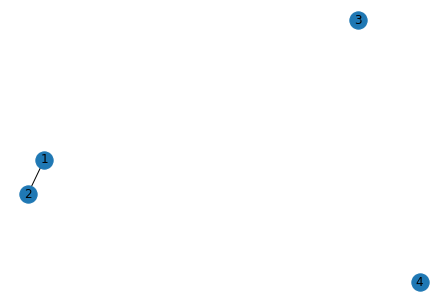

In [18]:
# Quick drawing of a graph 
nx.draw(G, with_labels=True)

##### c) Adding and Inspecting Attributes

In [19]:
# You can add attributes at creation
G.add_node(5, favorite_color='blue') # Add single node and atribute
G.add_nodes_from([(6, {'favorite_color': 'red'}),     # Add multiple nodes and attributes
                  (7, {'favorite_color': 'purple'})]) # Tuple with a node label and a dictionary

In [37]:
# Same thing with edges 
G.add_edge(5, 6, relationship = 'best friends')

In [40]:
# Accessing Node attributes 
print("Node 5 addtibutes:", G.nodes[5])
print("Edge 5-6 attributes:", G.get_edge_data(5,6))

Node 5 addtibutes: {'favorite_color': 'blue'}
Edge 5-6 attributes: {'relationship': 'best friends'}


In [48]:
# Adding attributes to existing nodes: 
favorite_foods = {
    1 : 'pizza',
    2 : 'mac and cheese',
    3 : 'balogna sandwich',
    4 : 'pizza',
    5 : 'chocolate',
    6 : 'pizza',
    7 : 'bananas'
}

In [51]:
# Set node attributes from from a dictionary
nx.set_node_attributes(G=G, values=favorite_foods, name="favorite_food")

In [52]:
print("Node 5 addtibutes:", G.nodes[4])

Node 5 addtibutes: {'favorite_food': 'pizza'}


##### Reading in Different Representations of Graphs 

* Graph and network data can come in many different representations. 
* Representations: 
    * Edge List 
    * Adjecency Matrix 
    * Adjacency List (not covered)
    * Incidence Matrix (not covered) 
* Note: Representations are related to, but not distinct from, the storage format. In our examples we'll be loading our data from text files. You may also have network data stored as `JSON`, `GEFX` , or other formats. For more details, check the docs. 

#### Grey's Anatomy Dataset
* This dataset looks at the record of all romantic encounters between characters from the TV Show Grey's Anatomy. 

##### Edge Lists
* An **edge list** is a common way of representing a graph. This representation can be thought of as a list of tuples, where each tuple represents an edge between two nodes in your graph. The nodes of the graph can be inferred by taking the set of objects in all tuples.